# PyMC3，コイン投げ
$\theta$: 表のでる確率，$N$:試行数，$k$:表の出た回数，$y$:ベルヌーイ試行したときの結果（例：y=(0,1,1,0,1)）。<br>
尤度関数は次である。<br>
$$
 f\left( {Y = y | \theta } \right)   =  {}_N C_k    \, \theta^k  \left( {1 - \theta} \right)^{N - k}
$$

In [16]:
#コンピュータシュミレーション入門p185
import pymc as pm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
np.random.seed(123)
num = 100 #コイン投げ回数
theta_real = 0.35 #コインの表が出る確率
y = stats.bernoulli.rvs(p=theta_real, size=num) #(0,1)のベルヌーイ試行として結果の格納
total_front = y.sum() #表の出た回数

#モデルの作成
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1.0, beta=1.0) #パラメータの事前分布
    y_rv = pm.Binomial('y_rv', n=num, p=theta, observed=total_front) #目標分布(2項分布)
#MCMC実行
    start = pm.find_MAP() #サンプリングの出発点（略可）
    step = pm.Metropolis() #サンプリング手法(略可)
    trace = pm.sample(draws=1000, tune=100, step=step, start=start)

/var/folders/jj/8tv4zm6n5wl7l4sfs9_bd4wm0000gp/T/ipykernel_21670/3412595190.py:13: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(draws=1000, tune=100, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 19 seconds.


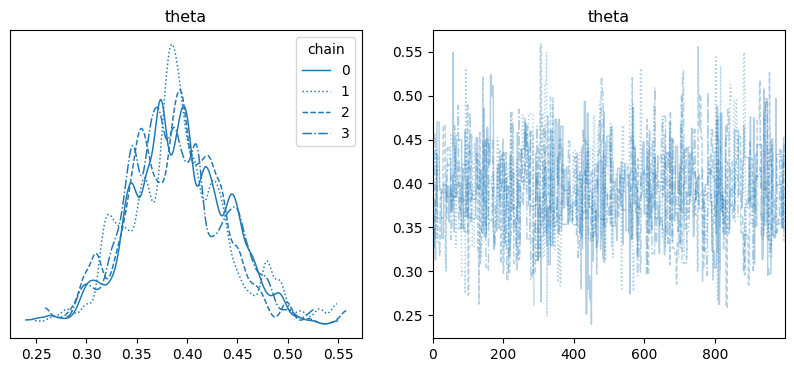

In [18]:
pm.plot_trace(trace, figsize=(10,4), legend=True)
plt.show()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.391,0.048,0.3,0.48,0.002,0.001,729.0,619.0,1.0


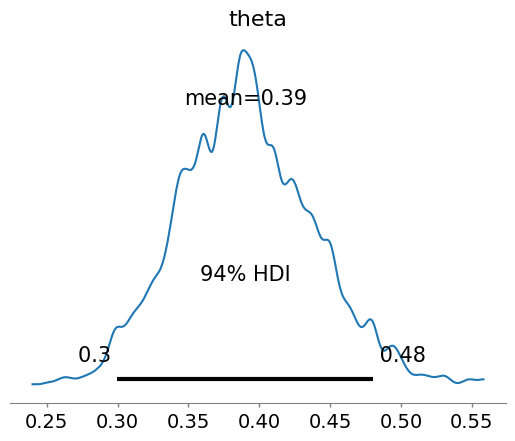

In [19]:
pm.plot_posterior(trace)
pm.summary(trace)